In [17]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
obispado = pd.read_csv('obispado_imeca.csv')
universidad = pd.read_csv('universidad_imeca.csv')
tecnl = pd.read_csv('tecnl_imeca.csv')
santacatarina = pd.read_csv('santacatarina_imeca.csv')

In [3]:
# Extraer la columna "IMECA" y agregar una nueva columna con el nombre de la base
universidad = universidad[['IndiceIMECA']]
universidad['Base'] = 'universidad'

obispado = obispado[['IndiceIMECA']]
obispado['Base'] = 'obispado'

santacatarina = santacatarina[['IndiceIMECA']]
santacatarina['Base'] = 'santacatarina'

tecnl = tecnl[['IndiceIMECA']]
tecnl['Base'] = 'tecnl'

# Unir verticalmente las bases de datos
resultado = pd.concat([universidad, obispado, santacatarina, tecnl], ignore_index=True)

resultado

,IndiceIMECA,Base
0,635.661591,universidad
1,550.831214,universidad
2,377.401508,universidad
3,238.860240,universidad
4,168.701826,universidad
...,...,...
36302,141.541590,tecnl
36303,144.650711,tecnl
36304,131.831369,tecnl
36305,138.255780,tecnl


In [11]:
# Valores nulos?
resultado.isnull().sum()

IndiceIMECA    0
Base           0
dtype: int64

In [7]:
# Aplicamos le modelo ANOVA
modelo = ols('IndiceIMECA ~ C(Base)', data=resultado).fit()
anova_table = sm.stats.anova_lm(modelo, typ=2)

In [8]:
print(anova_table)

                sum_sq       df           F  PR(>F)
C(Base)   6.163044e+06      3.0  614.036966     0.0
Residual  1.214568e+08  36303.0         NaN     NaN


**Prueba Post Hoc**

In [14]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Realizar la prueba post hoc de Tukey
posthoc = pairwise_tukeyhsd(endog=resultado['IndiceIMECA'], groups=resultado['Base'], alpha=0.05)

print(posthoc)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj  lower    upper   reject
-------------------------------------------------------------------
     obispado santacatarina  -8.4324   0.0 -10.7099  -6.1549   True
     obispado         tecnl -36.4319   0.0 -38.7087 -34.1551   True
     obispado   universidad -16.8785   0.0 -19.0033 -14.7536   True
santacatarina         tecnl -27.9995   0.0 -30.3134 -25.6856   True
santacatarina   universidad  -8.4461   0.0 -10.6106  -6.2815   True
        tecnl   universidad  19.5534   0.0  17.3896  21.7172   True
-------------------------------------------------------------------


C:\Users\isaac\AppData\Local\Temp\ipykernel_6148\919281110.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Base', y='IndiceIMECA', data=resultado, ci='sd', capsize=0.1, palette="viridis")


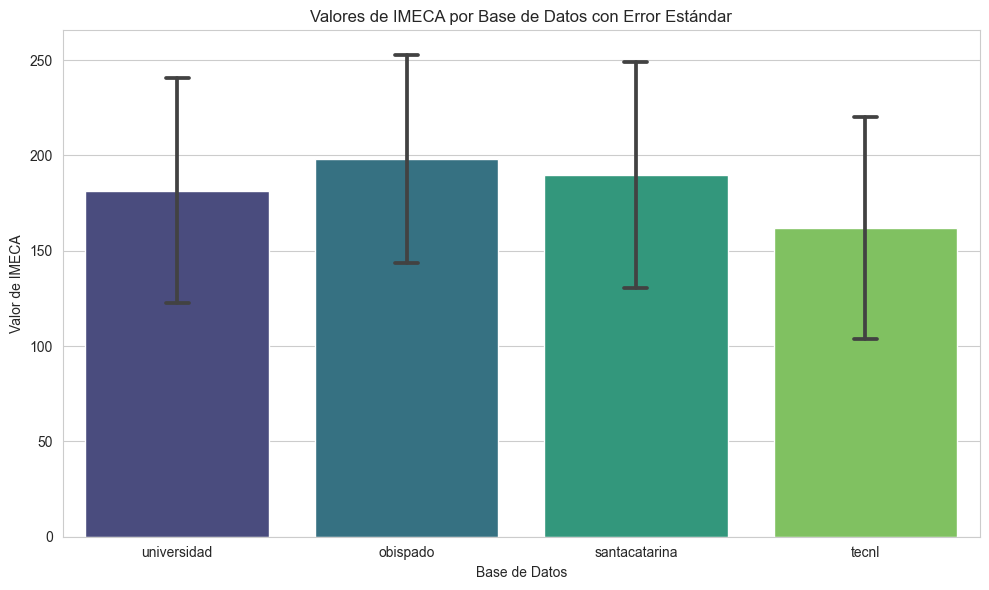

In [19]:
# Configurar el estilo de Seaborn
sns.set_style("whitegrid")

# Crear un gráfico de barras con errores estándar
plt.figure(figsize=(10, 6))
sns.barplot(x='Base', y='IndiceIMECA', data=resultado, ci='sd', capsize=0.1, palette="viridis")

# Título y etiquetas
plt.title('Valores de IMECA por Base de Datos con Error Estándar')
plt.ylabel('Valor de IMECA')
plt.xlabel('Base de Datos')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

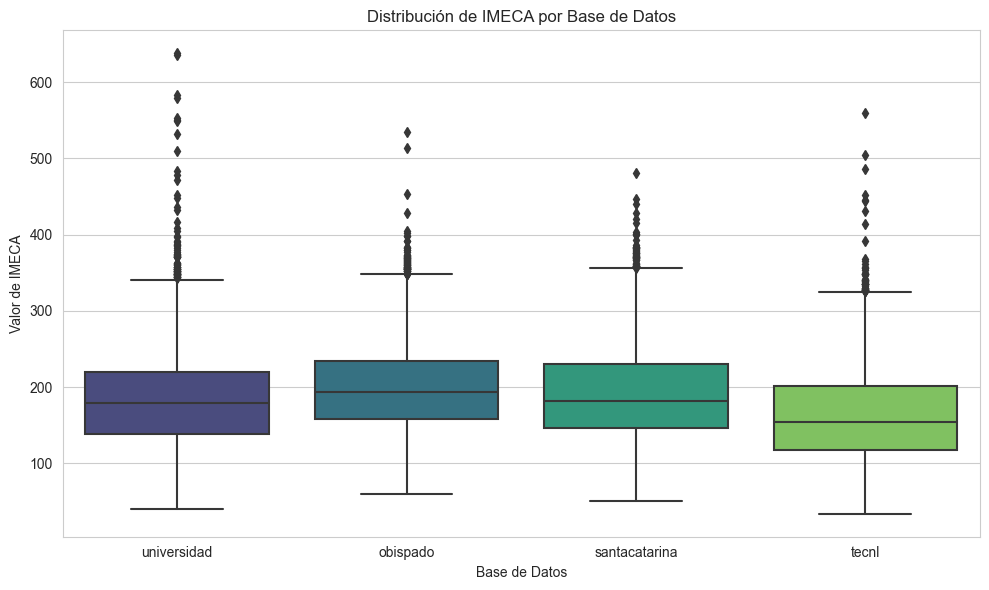

In [21]:
# Configurar el estilo de Seaborn
sns.set_style("whitegrid")

# Crear un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Base', y='IndiceIMECA', data=resultado, palette="viridis")

# Título y etiquetas
plt.title('Distribución de IMECA por Base de Datos')
plt.ylabel('Valor de IMECA')
plt.xlabel('Base de Datos')

# Mostrar el gráfico
plt.tight_layout()
plt.show()